# Book data exploration

I want to just run through the book archive and see if I can find some interesting word clouds.

I think I should start by figuring out how to grab books in english first.

It looks like that is in the metadata for each of the books.

## Documentation here:

https://docs.google.com/document/d/10cNGGYrDFu0BJg-pUYYzKpjB1TWkqKspTZl2YG-yLJ4/edit

## Important files at each identifier:
- `{item}_meta.xml` - contains metadata for each item like language and author
- `{item}_djvu.txt` - contains the raw text for the book

In [1]:
# Import libraries here:
import requests
from os import path
import xml.etree.ElementTree as ET
import re

# Workhorse data libraries
import pandas as pd
import numpy as np

# Wordcloud stuff
from PIL import Image
from wordcloud import WordCloud

#viz and interactive buttons
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline

## Read in the identifiers here
- use the index in the repo to load a list of books in the library into memory.

You can query books by id number like this:

`df.loc[index, 0]` this returns a string with the text identifer

In [2]:
df = pd.read_csv("2017-12-26_public-domain-books-dataset_800k-identifiers.csv",header=None)

## Dynamically create a url for each request

We're making a URL for both the full text and the meta data

In [3]:
base_url = 'https://archive.org/download/{itemid}/{itemid}_'
query_id = 200000

full_txt_url = base_url.format(itemid=df.loc[query_id,0]) + "djvu.txt"
meta_txt_url = base_url.format(itemid=df.loc[query_id,0]) + "meta.xml"

In [4]:
full_txt_url

'https://archive.org/download/descendantsofben00rice/descendantsofben00rice_djvu.txt'

## Pull out interesting info (like title) from the metadata

In [5]:
r_meta = requests.get(meta_txt_url)
tree_meta = ET.fromstring(r_meta.content)

In [6]:
tree_meta[0].text

'Descendants of Benjamin Rice'

In [7]:
tree_meta.find('title').text

'Descendants of Benjamin Rice'

## Make a simple word cloud

In [8]:
r_text = requests.get(full_txt_url)

In [9]:
wc = WordCloud(max_words=500).generate(r_text.text)

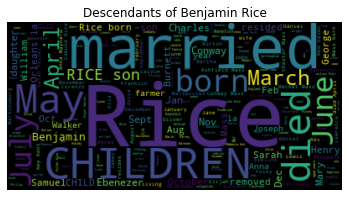

In [10]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title(tree_meta[0].text)
plt.show()

## Wrap everything up in a function for plotting the cloud and title

In [23]:
def cloud_plotter(qid='random', id_list=df):
    """
    This function takes in an ID number, then prints everything out nice like
    """
    # Generate a random number if that's what you want
    if qid == 'random':
        qid=np.random.randint(low=0,high=len(df))
    print(qid)
    
    # Form URLs
    base_url = 'https://archive.org/download/{itemid}/{itemid}_'
    full_txt_url = base_url.format(itemid=df.loc[qid,0]) + "djvu.txt"
    meta_txt_url = base_url.format(itemid=df.loc[qid,0]) + "meta.xml"
    
    # Request metadata and full text
    r_meta = requests.get(meta_txt_url)
    r_text = requests.get(full_txt_url)
    
    # Parse metadata
    tree_meta = ET.fromstring(r_meta.content)
    
    # Plot wordcloud
    wc = WordCloud().generate(r_text.text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(tree_meta.find('title').text)
    plt.show()

172941


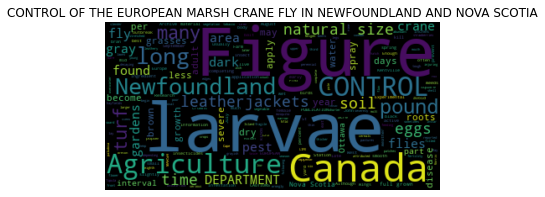

In [27]:
# Grab a book at random :)
cloud_plotter()